In [133]:
import math

#### INPUTS ####
count = 4 # num gen files per file
step = 40

assert int(math.sqrt(count)) == math.sqrt(count)

#### CONSTS ####
# indiv files
#FWIDTH, FHEIGHT = 14400, 10800
FWIDTH, FHEIGHT = 15360, 23040
FPOINTS = FWIDTH * FHEIGHT
# whole map
NWIDTH, NHEIGHT = 8, 6
#WIDTH, HEIGHT = 14400 * 6, 10800 * 4
WIDTH, HEIGHT = FWIDTH * NWIDTH, FHEIGHT * NHEIGHT
TPOINTS = WIDTH * HEIGHT


In [134]:
#### FUNCS  ####
def p(title, value):
    print(f'{title}: {value}')

In [135]:
#### FOLDER ####
stepLat = FHEIGHT / math.sqrt(count)
stepLon = FWIDTH / math.sqrt(count)
incrementLat = 180 / (HEIGHT / stepLat)
incrementLon = 360 / (WIDTH / stepLon)
cellsize = incrementLon / (stepLon / step)
ncols = math.sqrt(count) * (stepLon / step) * NWIDTH
nrows = math.sqrt(count) * (stepLat / step) * NHEIGHT
ppc = ncols / 360
total = ncols * nrows
reduc = TPOINTS / total

p('step', (stepLat, stepLon))
p('inc', (incrementLat, incrementLon))
p('cell', cellsize)
p('fol col', ncols)
p('fol row', nrows)
p('ppc', ppc)
p('fol t', total)
p('reduc', reduc)

step: (11520.0, 7680.0)
inc: (15.0, 22.5)
cell: 0.1171875
fol col: 3072.0
fol row: 3456.0
ppc: 8.533333333333333
fol t: 10616832.0
reduc: 1600.0


In [136]:
####  FILE  ####
ncols = stepLon / step
nrows = stepLat / step
total = ncols * nrows
nfiles = count * NWIDTH * NHEIGHT

p('file col', ncols)
p('file row', nrows)
p('file t', total)
p('t files', nfiles)

file col: 192.0
file row: 288.0
file t: 55296.0
t files: 192


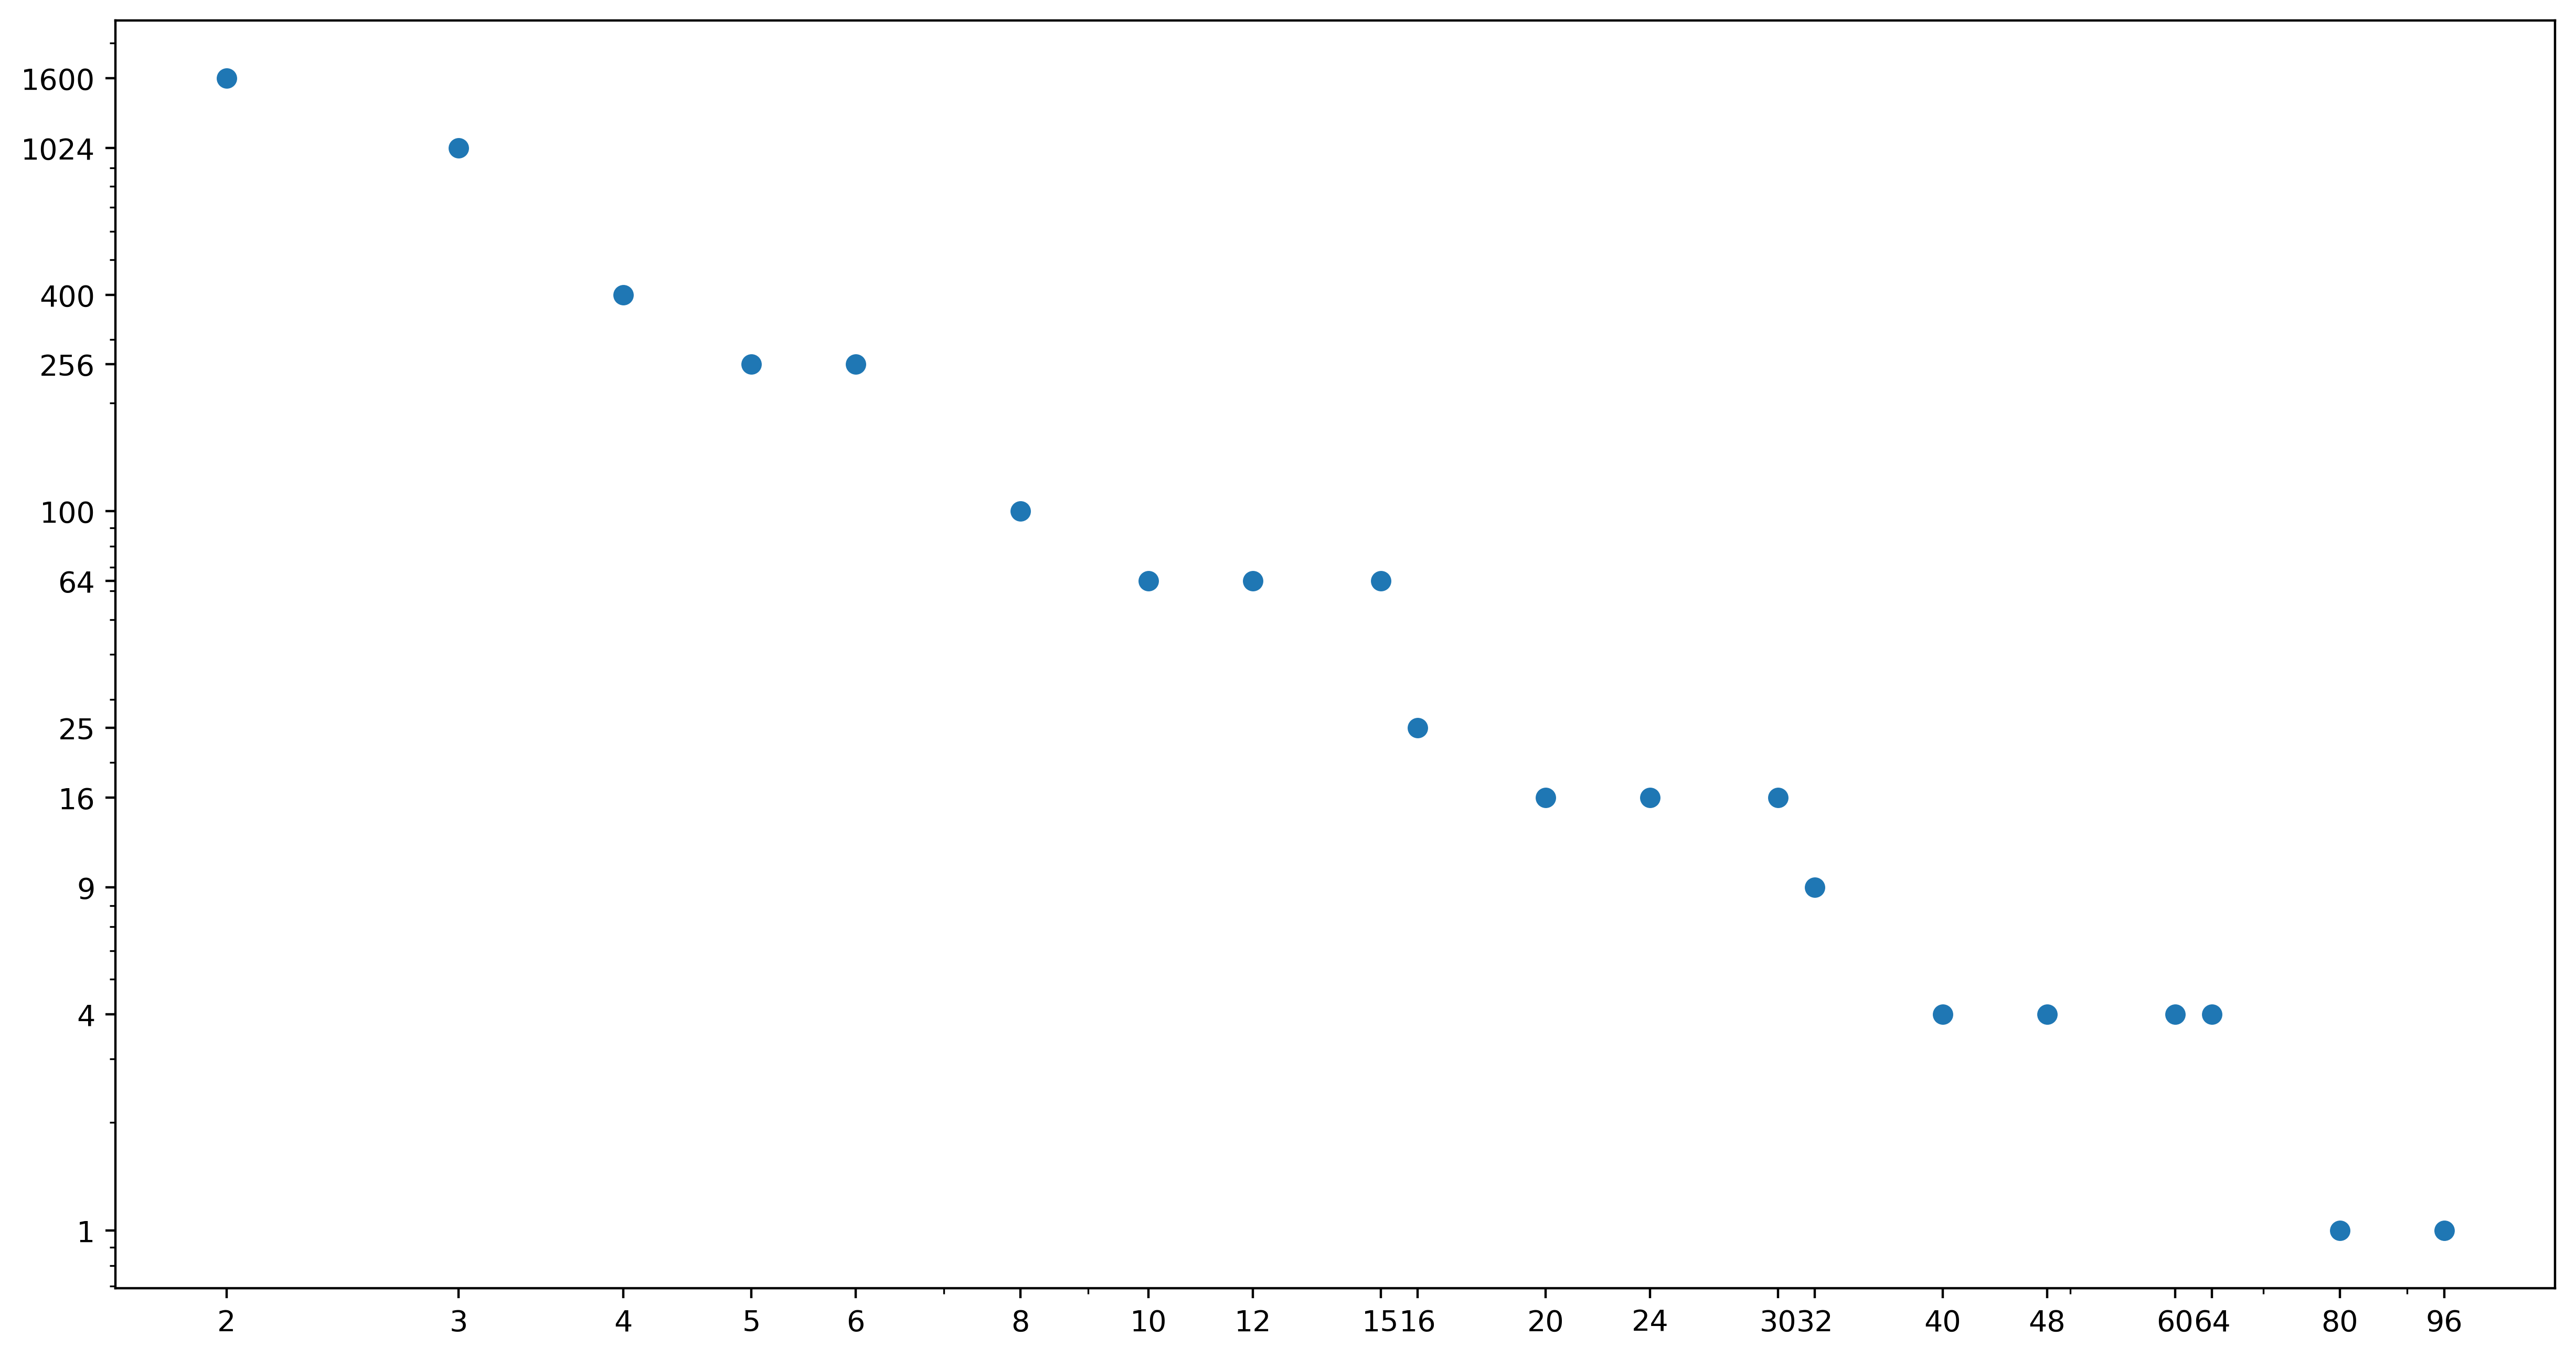

In [137]:
from matplotlib import pyplot as plt
from matplotlib import ticker

testAllValues = True
countRange = (1, 50)
stepRange = (1, 100)

x = []
y = []

if testAllValues:
    for _step in range(stepRange[0], stepRange[1] + 1):
        for _c in range(countRange[0], countRange[1] + 1):
            _lat = FHEIGHT / _c
            _lon = FWIDTH / _c
            
            cols = _lon / _step
            rows = _lat / _step

            if (int(cols) == cols and int(rows) == rows and cols * rows < 65536):
                x.append(_step)
                y.append(_c * _c)
                break

    fig, ax = plt.subplots(figsize=(15,8))
    fig.set_dpi(400)
    ax.scatter(x, y)

    ax.set_yscale('log')
    ax.set_yticks(list(set(y)))
    ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    ax.set_xscale('log')
    ax.set_xticks(x)
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    
    plt.show()